## Logistic regressions

In [1]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Load the numpy .npz file
with np.load(os.path.join('data', 'cifar4-train.npz'), allow_pickle=False) as data:
    cifar4_data = dict(data.items())
    
print('Data loaded')
print('It is a dictionary with keys:', list(cifar4_data.keys()))

Data loaded
It is a dictionary with keys: ['pixels', 'overfeat', 'labels', 'names', 'allow_pickle']


In [2]:
X = cifar4_data['overfeat']
y = cifar4_data['labels']

print('X shape:',X.shape)
print('y shape:', y.shape)

X shape: (5000, 4096)
y shape: (5000,)


From the data exploration we use 164 features and we apply it to the data set.

In [3]:
# Splitting the data
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=4000,test_size=1000,
                                          random_state=0, stratify=y)

# checking the shapes
print('X_train:', X_train.shape, X_train.dtype)
print('y_train:', y_train.shape, y_train.dtype)
print('X_test:', X_test.shape, X_test.dtype)
print('y_test:', y_test.shape, y_test.dtype)

X_train: (4000, 4096) float32
y_train: (4000,) int64
X_test: (1000, 4096) float32
y_test: (1000,) int64


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Create pipeline
pipe = Pipeline([
    ('pca',None),
    ('logreg',LogisticRegression())
])

# Create cross-validation object
grid_cv=GridSearchCV(pipe,[{
    'logreg__multi_class':['ovr'],
    'logreg__C':[0.1,1,10],
    'logreg__solver':['liblinear']
},{
    'pca':[PCA(n_components=164)],
    'logreg__multi_class':['ovr'],
    'logreg__C':[0.1,1,10],
    'logreg__solver':['liblinear']
}],cv=5)

# Fit estimator
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', None), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logreg__multi_class': ['ovr'], 'logreg__C': [0.1, 1, 10], 'logreg__solver': ['liblinear']}, {'pca': [PCA(copy=True, iterated_power='auto', n_components=164, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)], 'logreg__multi_class': ['ovr'], 'logreg__C': [0.1, 1, 10], 'logreg__solver': ['liblinear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [5]:
df = pd.DataFrame.from_items([
    ('alpha',grid_cv.cv_results_['param_logreg__C']),
    ('mean accuracy',grid_cv.cv_results_['mean_test_score']),
    ('standard deviation',grid_cv.cv_results_['std_test_score'])
])
df.sort_values(by='mean accuracy',ascending=False)

,alpha,mean accuracy,standard deviation
3,0.1,0.83175,0.015980
5,10,0.82925,0.016058
4,1,0.82725,0.015133
0,0.1,0.82700,0.012614
1,1,0.82000,0.013784
2,10,0.81500,0.015871


In [6]:
# Best combination
idx_max = df.loc[df['mean accuracy'].idxmax()]

print('Top accuracy across folds:',idx_max[1],
      ' (std:',idx_max[2],
      ') with 164 components and alpha:',idx_max[0])

Top accuracy across folds: 0.83175  (std: 0.01598045681449687 ) with 164 components and alpha: 0.1


In [7]:
# Compute predictions with the "best_estimator_" attribute
grid_cv.best_estimator_.predict(X_test)

array([2, 2, 2, 0, 3, 0, 2, 0, 0, 1, 3, 1, 2, 2, 3, 2, 3, 1, 1, 0, 0, 1,
       3, 3, 0, 1, 1, 3, 1, 0, 2, 2, 1, 3, 1, 1, 3, 2, 3, 3, 2, 0, 0, 1,
       2, 0, 3, 1, 1, 2, 0, 0, 1, 2, 2, 3, 3, 2, 2, 2, 3, 2, 1, 0, 3, 3,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 3, 3, 2, 1, 3, 2, 2, 0, 2, 1, 2, 0,
       1, 0, 0, 2, 1, 3, 1, 3, 1, 3, 0, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0,
       3, 1, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1, 0, 1, 2, 3, 3, 2, 2, 2, 3,
       0, 1, 1, 1, 2, 3, 0, 2, 1, 3, 0, 3, 1, 1, 3, 2, 2, 1, 2, 2, 2, 3,
       2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 3, 3, 1,
       3, 0, 0, 2, 1, 0, 2, 1, 2, 1, 3, 1, 1, 3, 3, 3, 1, 0, 1, 3, 0, 0,
       2, 2, 0, 0, 1, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 1, 3, 2, 0, 3, 0, 3,
       2, 0, 1, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3,
       3, 2, 0, 0, 2, 0, 1, 3, 0, 2, 3, 3, 2, 0, 3, 1, 3, 3, 3, 3, 0, 3,
       1, 3, 3, 1, 0, 2, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 2, 0, 3, 2, 3, 0,
       3, 1, 1, 0, 0, 2, 3, 2, 0, 2, 3, 0, 2, 2, 2,

In [8]:
accuracy = grid_cv.score(X_test,y_test)

In [9]:
print('Logistic regression accuracy (test set):',accuracy)

Logistic regression accuracy (test set): 0.805


## Second task
#### pick ten images from the test set and compute probabilities

In [10]:
import random

## 10 random indices 
ten_imgs_idx = random.choices(range(1000), k=10)

preds = grid_cv.predict_proba(X_test[ten_imgs_idx])

prob_preds = pd.DataFrame(np.around(preds, decimals=2),
                          columns= cifar4_data['names'],
                          index=['image {}'.format(i) for i in range(1, 11)])

In [11]:
prob_preds

,truck,car,airplane,ship
image 1,0.03,0.46,0.01,0.50
image 2,0.00,0.01,0.96,0.02
image 3,0.00,0.02,0.89,0.08
image 4,0.05,0.01,0.94,0.00
image 5,0.82,0.14,0.02,0.02
image 6,0.00,0.49,0.00,0.51
image 7,0.02,0.00,0.75,0.23
image 8,0.01,0.13,0.17,0.69
image 9,0.15,0.05,0.01,0.79
image 10,0.61,0.15,0.23,0.01


In [12]:
ten_imgs_idx

[961, 620, 157, 522, 132, 116, 254, 469, 650, 826]

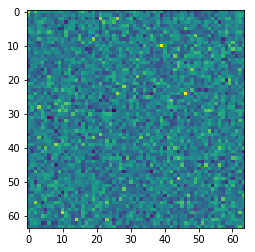

In [13]:
# Extract the 303 image
flat_img = X_test[303, :]

# Reshape the image
img = flat_img.reshape(64,64)

# Plot the rescaled image
plt.imshow(img)
plt.show()

### Try with different regularization strengths. Write your observations.